In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("marketing_AB.csv")

# Display the first 5 rows
df.head()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
# Check for missing values
df.isnull().sum()


Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [6]:
# Calculate conversion rates
conversion_rates = df.groupby("test group")["converted"].mean()
print(conversion_rates)


test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [7]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["converted"], df["test group"])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

# Check significance
if p < 0.05:
    print("Reject null hypothesis: There is a significant difference.")
else:
    print("Fail to reject null hypothesis: No significant difference.")

Chi-Square Test Statistic: 54.005823883685245
P-value: 1.9989623063390075e-13
Reject null hypothesis: There is a significant difference.


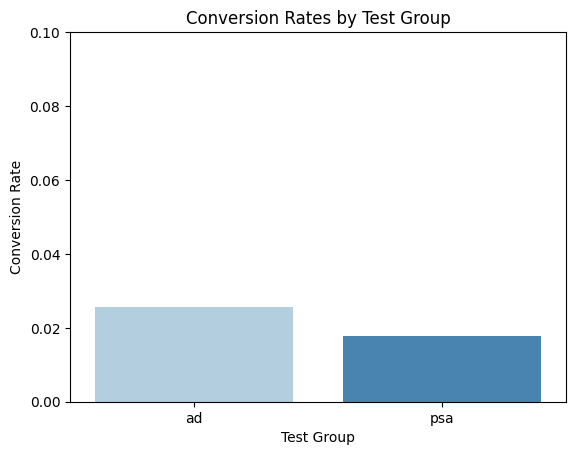

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert index to a column for Seaborn compatibility
conversion_df = conversion_rates.reset_index()
conversion_df.columns = ["Test Group", "Conversion Rate"]

# Bar plot of conversion rates
sns.barplot(data=conversion_df, x="Test Group", y="Conversion Rate", hue="Test Group", palette="Blues", legend=False)

plt.title("Conversion Rates by Test Group")
plt.xlabel("Test Group")
plt.ylabel("Conversion Rate")
plt.ylim(0, 0.1)  # Adjust limits for better visualization
plt.show()